In [ ]:
# Import libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%pylab inline

In [125]:
r = requests.get('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051_indicators.txt')
''' Note that this list is the top 200 only if the whole list is sorted
    This check is done at the end, after the dataframe has been created (see below).
    Moreover, this code would work for any 'top k' '''  
data = r.json()['data'][:200]

In [ ]:
df = pd.DataFrame(columns=['Rank', 'Country', 'Region', 'Total Faculty Members',
                           'International Faculty Members', 'Total Students', 
                           'International Students'])
df.index.name = 'Name'

'''Get a single number from the details webpage. ClassName is the information on the webpage
   to be returned.'''
def getCount(details, className):
        attr = BeautifulSoup(details.text, 'html.parser').find('div', class_=className)
        if attr is None:
            print ("No attribute '", className, "' found")
            return None
        return int(attr.find('div', class_="number").text.strip().replace(',', ''))

'Dataframe generation'    
for d in data:
    soup = BeautifulSoup(d['uni'], 'html.parser')
    details = requests.get("https://www.topuniversities.com" + soup.a.get('href'))
    index = soup.a.text.strip()
    print("Processing", d['overall_rank'], ":", index)
    df.loc[index] = [int(d['overall_rank']), d['location'], d['region'], 
                     getCount(details, 'total faculty'), 
                     getCount(details, 'inter faculty'),
                     getCount(details, 'total student'),
                     getCount(details, 'total inter')]

In [111]:
df.index.is_unique

True

In [127]:
'Check that the dataframe has the correct length'
len(df)

200

In [227]:
'Now we can check for rank correctness'
# There is no built-in method
def checkSorted(df):
    col = df['Rank']
    for i in range(len(col) - 1):
        if col[i + 1] < col[i] or col[i] > len(col):
            print("The list is not correct:")
            print(df.iloc[i], "\n")
            print(df.iloc[i + 1])
            return False
    return col[len(col) - 1] <= len(col)

checkSorted(df)

True

In [230]:
 ''' As of 20/10/2017, in the potential 'top 200' the University of Dresden has rank 281.
 However, we suspect it is wrong: there is no university with rank 198 (there are 3 universities with 
 rank 195 and one with 199) and there are two universities with rank 281, including the University of Dresden.
 However, rank 282 is filled and all the ranks afterwards are correct. This leads us to believe that one of the 
 two universities with rank 281 should have rank 198 or 195. Since the University of Dresden is indexed among 
 the universities of rank 195, the simplest way to restore ordering in the university list is to assign rank 195
 to the university of Dresden.'''

df.loc['Technische Universität Dresden', 'Rank'] = 195
checkSorted(df)

True

In [231]:
df

,Rank,Country,Region,Total Faculty Members,International Faculty Members,Total Students,International Students
Name,,,,,,,
Massachusetts Institute of Technology (MIT),1,United States,North America,2982,1679,11067,3717
Stanford University,2,United States,North America,4285,2042,15878,3611
Harvard University,3,United States,North America,4350,1311,22429,5266
California Institute of Technology (Caltech),4,United States,North America,953,350,2255,647
University of Cambridge,5,United Kingdom,Europe,5490,2278,18770,6699
University of Oxford,6,United Kingdom,Europe,6750,2964,19720,7353
UCL (University College London),7,United Kingdom,Europe,6345,2554,31080,14854
Imperial College London,8,United Kingdom,Europe,3930,2071,16090,8746
University of Chicago,9,United States,North America,2449,635,13557,3379


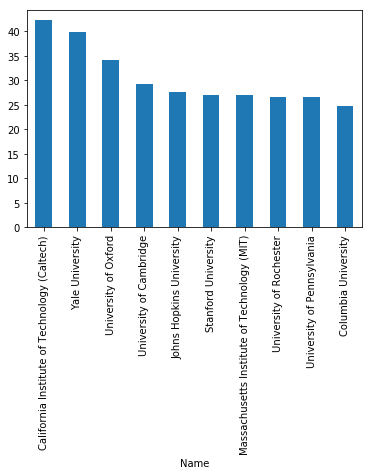

In [232]:
# Best universities by ratio of faculty members / students
ratios = (df['Total Faculty Members'] / df['Total Students']).sort_values(ascending=False)
(ratios * 100)[:10].plot(kind='bar', )

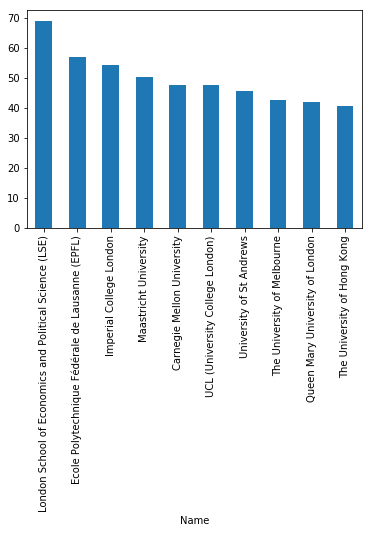

In [233]:
# Best universities by ratio of international students
ratios = (df['International Students'] / df['Total Students']).sort_values(ascending=False)
(ratios * 100)[:10].plot(kind='bar')

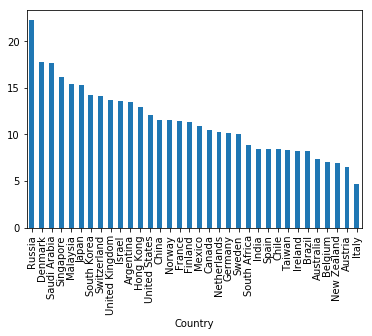

In [234]:
# Best university groups according to the ratio of 2 given attributes 
def groupRatios(df, column, numerator, denominator):
    groups = df.groupby(column)
    return (groups[numerator].sum() / groups[denominator].sum()).sort_values(ascending=False) * 100

groupRatios(df, 'Country', 'Total Faculty Members', 'Total Students').plot(kind='bar')

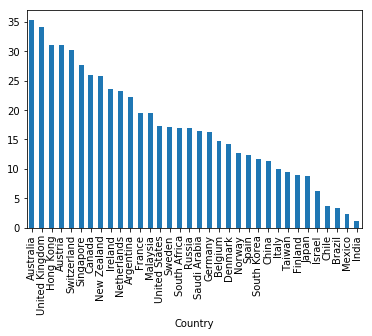

In [235]:
groupRatios(df, 'Country', 'International Students', 'Total Students').plot(kind='bar')

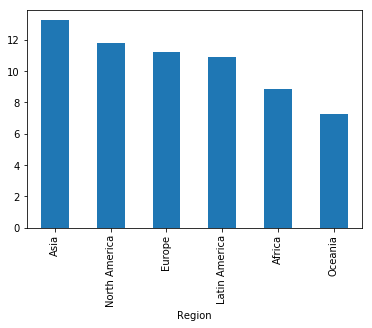

In [236]:
groupRatios(df, 'Region', 'Total Faculty Members', 'Total Students').plot(kind='bar')

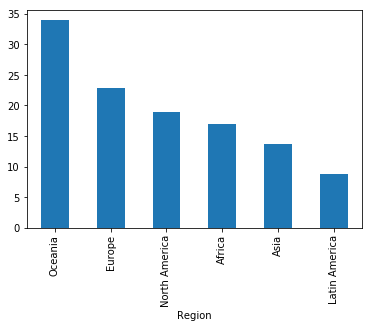

In [237]:
groupRatios(df, 'Region', 'International Students', 'Total Students').plot(kind='bar')

In [240]:
r2 = requests.get('https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json')
''' Note that this list is the top 200 only if the whole list is sorted
    This check is done at the end, after the dataframe has been created (see below).
    Moreover, this code would work for any 'top k' '''  
data2 = r2.json()['data'][:200]

In [241]:
df2 = pd.DataFrame(columns=['Rank', 'Country', 'Region', 'Total Faculty Members',
                           'International Faculty Members', 'Total Students', 
                           'International Students', 'Ratio Faculty to Student', 'Ratio Intl Students'])
df2.index.name = 'Name'

'Dataframe generation'    
for d in data2:
    index = d['name']
    rank = int(d['rank'].strip("="))
    print("Processing", rank, ":", index)
    num_students = int(d['stats_number_students'].replace(",", ""))
    num_faculty = round(num_students / float(d['stats_student_staff_ratio']))
    ratio_faculty_student= 1 / float(d['stats_student_staff_ratio'])    
    ratio_intl_student = float(d['stats_pc_intl_students'].strip("%")) / 100
    num_intl_students = round(ratio_intl_student * num_students)
    df2.loc[index] = [rank, d['location'], '?', num_faculty, 
                      '?', num_students, num_intl_students, 
                      ratio_faculty_student, ratio_intl_student]

Processing 1 : University of Oxford
Processing 2 : University of Cambridge
Processing 3 : California Institute of Technology
Processing 3 : Stanford University
Processing 5 : Massachusetts Institute of Technology
Processing 6 : Harvard University
Processing 7 : Princeton University
Processing 8 : Imperial College London
Processing 9 : University of Chicago
Processing 10 : ETH Zurich – Swiss Federal Institute of Technology Zurich
Processing 10 : University of Pennsylvania
Processing 12 : Yale University
Processing 13 : Johns Hopkins University
Processing 14 : Columbia University
Processing 15 : University of California, Los Angeles
Processing 16 : University College London
Processing 17 : Duke University
Processing 18 : University of California, Berkeley
Processing 19 : Cornell University
Processing 20 : Northwestern University
Processing 21 : University of Michigan
Processing 22 : National University of Singapore
Processing 22 : University of Toronto
Processing 24 : Carnegie Mellon Uni

In [ ]:
# fill NAs

In [242]:
df2

,Rank,Country,Region,Total Faculty Members,International Faculty Members,Total Students,International Students,Ratio Faculty to Student,Ratio Intl Students
Name,,,,,,,,,
University of Oxford,1,United Kingdom,?,1822,?,20409,7755,0.089286,0.38
University of Cambridge,2,United Kingdom,?,1687,?,18389,6436,0.091743,0.35
California Institute of Technology,3,United States,?,340,?,2209,596,0.153846,0.27
Stanford University,3,United States,?,2113,?,15845,3486,0.133333,0.22
Massachusetts Institute of Technology,5,United States,?,1285,?,11177,3800,0.114943,0.34
Harvard University,6,United States,?,2284,?,20326,5285,0.112360,0.26
Princeton University,7,United States,?,958,?,7955,1909,0.120482,0.24
Imperial College London,8,United Kingdom,?,1391,?,15857,8721,0.087719,0.55
University of Chicago,9,United States,?,2181,?,13525,3381,0.161290,0.25


In [238]:
checkSorted(df2)

True